In [1]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


In [2]:
# Step 2: Load the dataset
digits = datasets.load_digits()

In [4]:
print("Dataset shape:", digits.images.shape) # (1797, 8, 8)
print("Labels shape:", digits.target.shape) # (1797,)

Dataset shape: (1797, 8, 8)
Labels shape: (1797,)


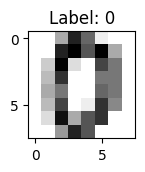

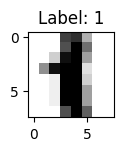

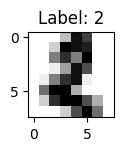

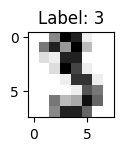

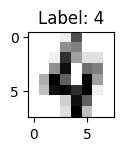

In [5]:
# Step 3: Display first 5 images with labels
plt.figure(figsize=(8, 2))
for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation="nearest")
  plt.title(f"Label: {digits.target[i]}")
  plt.show()


In [6]:
# Step 4: Preprocess - flatten images
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1)) # (1797, 64)
y = digits.target

In [7]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, shuffle=True, random_state=42
)


In [8]:
# Step 6: Create and train SVM model
clf = svm.SVC(gamma=0.001, C=100) # RBF kernel by default
print("\nTraining the model...")
clf.fit(X_train, y_train)
clf.fit(X_train, y_train)
print("Training completed!")
clf



Training the model...
Training completed!


SVC(C=100, gamma=0.001)

In [9]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

In [10]:
# Step 7: Predictions
y_pred = clf.predict(X_test)

In [11]:
# Step 8: Model Evaluation
print("\nAccuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.9888888888888889

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [

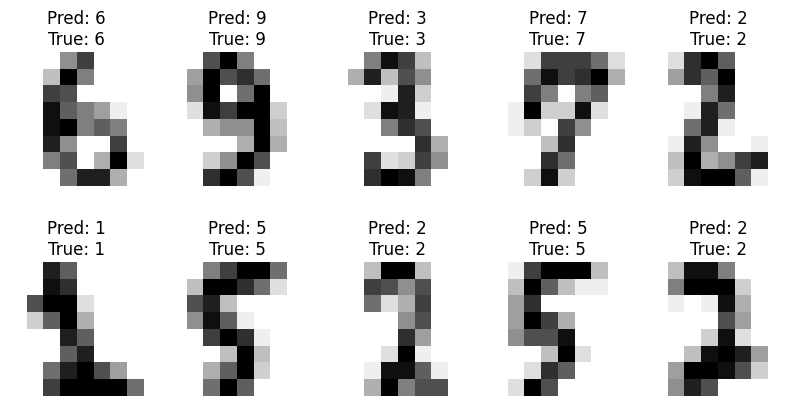

In [14]:
# Step 9: Visualize some predictions
# Step 8: Visualize predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, image, prediction, label in zip(axes.ravel(), X_test, y_pred, y_test):
  ax.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title(f"Pred: {prediction}\nTrue: {label}")
  ax.axis("off")
plt.show()


Testing on one image...


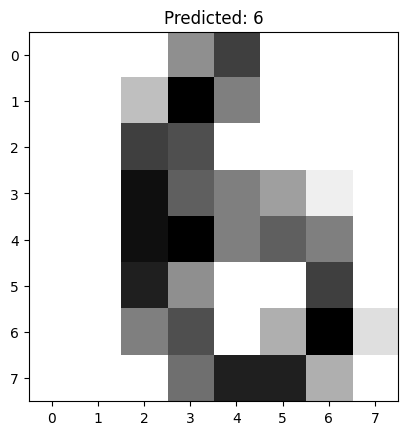

In [15]:
# Step 10: Test on a single image
print("\nTesting on one image...")
sample_image = X_test[0].reshape(1, -1) # reshape for model input
predicted_value = clf.predict(sample_image)
plt.imshow(X_test[0].reshape(8, 8), cmap=plt.cm.gray_r, interpolation="nearest")
plt.title(f"Predicted: {predicted_value[0]}")
plt.show()
